# CLUSTERING

### Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### Leemos los datos

In [4]:
filename = "nasa/event/event_wind_summary/event_wind_summary.csv"
fd = pd.read_csv(filename);
fd.head()

,ARCHIVED_RECORD_NUMBER,SEISMIC_TIME_SOLS,ORIGINAL_FILE_NUMBER,ORIGINAL_RECORD_NUMBER,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,DATA_ACQUSITION_MINUTE,DATA_ACQUISITION_SECOND,MEDIAN_X_AXIS,FIRST_X_AXIS,...,RMS_Z_AXIS_X100,MEAN_X_AXIS_CROSSINGS,MEAN_Y_AXIS_CROSSINGS,MEAN_Z_AXIS_CROSSINGS,METEO_TIME_SOLS,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE,WIND_SEISMIC_INTERVAL
0,1.0,101,126.0,0.0,12.0,34.0,16.0,26.0,2.0,2.0,...,105.0,15.0,5.0,18.0,0.5098,0.97,3.782,39.3,96.2,45256.0
1,2.0,101,154.0,0.0,12.0,34.0,43.0,51.0,1.0,2.0,...,103.0,19.0,7.0,20.0,0.5101,0.97,3.784,39.4,96.2,45283.0
2,3.0,101,207.0,0.0,12.0,35.0,35.0,51.0,1.0,1.0,...,113.0,25.0,9.0,24.0,0.5107,0.97,3.789,39.4,96.3,45335.0
3,4.0,101,260.0,0.0,12.0,36.0,26.0,51.0,1.0,1.0,...,111.0,18.0,12.0,27.0,0.5112,0.97,3.793,39.4,96.4,45386.0
4,5.0,101,313.0,0.0,12.0,37.0,18.0,51.0,1.0,2.0,...,108.0,5.0,14.0,29.0,0.5118,0.97,3.797,39.5,96.6,45438.0


In [31]:
fd.SEISMIC_TIME_SOLS.describe()

count    273330.000000
mean        629.951674
std         285.681429
min         101.000000
25%         408.000000
50%         631.000000
75%         903.000000
max        1381.000000
Name: SEISMIC_TIME_SOLS, dtype: float64

In [32]:
fd.columns

Index(['ARCHIVED_RECORD_NUMBER', 'SEISMIC_TIME_SOLS', 'ORIGINAL_FILE_NUMBER',
       'ORIGINAL_RECORD_NUMBER', 'DATA_ACQUISITION_SOL',
       'DATA_ACQUISITION_HOUR', 'DATA_ACQUSITION_MINUTE',
       'DATA_ACQUISITION_SECOND', 'MEDIAN_X_AXIS', 'FIRST_X_AXIS',
       'MAXIMUM_X_AXIS', 'MINIMUM_X_AXIS', 'RMS_X_AXIS_X100',
       'RMS_Y_AXIS_X100', 'RMS_Z_AXIS_X100', 'MEAN_X_AXIS_CROSSINGS',
       'MEAN_Y_AXIS_CROSSINGS', 'MEAN_Z_AXIS_CROSSINGS', 'METEO_TIME_SOLS',
       'WINDSPEED', 'PRESSURE', 'WIND_DIRECTION', 'AIR_TEMPERATURE',
       'WIND_SEISMIC_INTERVAL'],
      dtype='object')

In [33]:
fd[fd != np.nan].head(5)

,ARCHIVED_RECORD_NUMBER,SEISMIC_TIME_SOLS,ORIGINAL_FILE_NUMBER,ORIGINAL_RECORD_NUMBER,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,DATA_ACQUSITION_MINUTE,DATA_ACQUISITION_SECOND,MEDIAN_X_AXIS,FIRST_X_AXIS,...,RMS_Z_AXIS_X100,MEAN_X_AXIS_CROSSINGS,MEAN_Y_AXIS_CROSSINGS,MEAN_Z_AXIS_CROSSINGS,METEO_TIME_SOLS,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE,WIND_SEISMIC_INTERVAL
0,1.0,101,126.0,0.0,12.0,34.0,16.0,26.0,2.0,2.0,...,105.0,15.0,5.0,18.0,0.5098,0.97,3.782,39.3,96.2,45256.0
1,2.0,101,154.0,0.0,12.0,34.0,43.0,51.0,1.0,2.0,...,103.0,19.0,7.0,20.0,0.5101,0.97,3.784,39.4,96.2,45283.0
2,3.0,101,207.0,0.0,12.0,35.0,35.0,51.0,1.0,1.0,...,113.0,25.0,9.0,24.0,0.5107,0.97,3.789,39.4,96.3,45335.0
3,4.0,101,260.0,0.0,12.0,36.0,26.0,51.0,1.0,1.0,...,111.0,18.0,12.0,27.0,0.5112,0.97,3.793,39.4,96.4,45386.0
4,5.0,101,313.0,0.0,12.0,37.0,18.0,51.0,1.0,2.0,...,108.0,5.0,14.0,29.0,0.5118,0.97,3.797,39.5,96.6,45438.0


In [76]:
'''
datos_temp = fd[['DATA_ACQUISITION_SOL', 'DATA_ACQUISITION_HOUR',
       'DATA_ACQUSITION_MINUTE', 'DATA_ACQUISITION_SECOND']];

'''

datos_gen  = fd[['DATA_ACQUISITION_SOL', 'DATA_ACQUISITION_HOUR',
       'DATA_ACQUSITION_MINUTE', 'DATA_ACQUISITION_SECOND', 'WINDSPEED',
       'PRESSURE', 'WIND_DIRECTION', 'AIR_TEMPERATURE',
       'WIND_SEISMIC_INTERVAL']] ; 

datos_var = fd[['DATA_ACQUISITION_SOL', 'DATA_ACQUISITION_HOUR','WINDSPEED','AIR_TEMPERATURE','MAXIMUM_X_AXIS','MEDIAN_X_AXIS']];
datos_pca = fd[['SEISMIC_TIME_SOLS','WINDSPEED','AIR_TEMPERATURE','MAXIMUM_X_AXIS','PRESSURE']]
#datos = pd.concat([datos_temp,datos_var], axis = 1) ; 
datos_var.shape

(273330, 6)

grupos = datos_var.groupby('DATA_ACQUISITION_SOL');
grupos = datos_var[datos_var.DATA_ACQUISITION_SOL == 12 ]
grupos.describe()

### Datos estadísticos básicos

In [35]:
# Usaremos como dataframe la tabla datos_var sin unidades de tiempo.
datos_var.describe()

,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,WINDSPEED,AIR_TEMPERATURE,MAXIMUM_X_AXIS,MEDIAN_X_AXIS
count,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000
mean,10.423230,29.075649,3.670592,188.117580,9.492022,3.041126
std,8.817766,17.209966,4.298901,22.850315,13.855732,4.200320
min,0.000000,0.000000,0.000000,49.800000,0.000000,-127.000000
25%,2.000000,14.000000,1.550000,170.800000,4.000000,2.000000
50%,7.000000,29.000000,2.620000,185.600000,5.000000,2.000000
75%,20.000000,44.000000,4.700000,200.300000,7.000000,2.000000
max,24.000000,59.000000,531.110000,337.300000,127.000000,119.000000


Lo primero será buscar relaciones haciendo uso de la correlacion lineal entre variables, para ello:

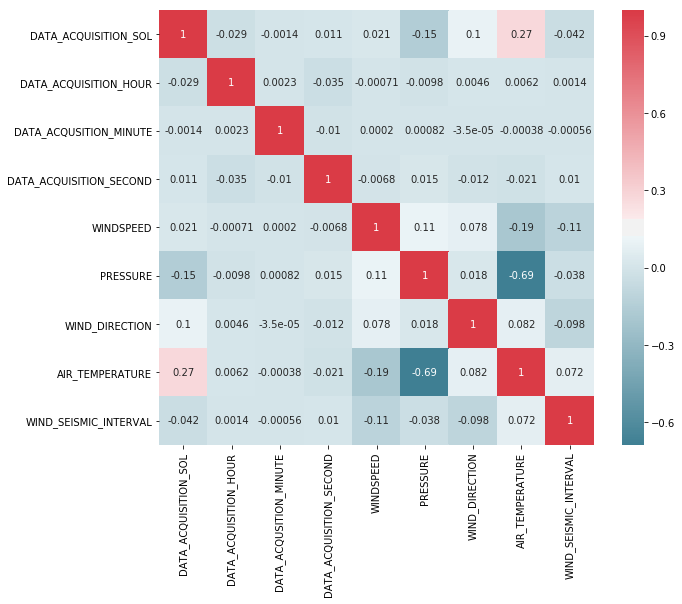

In [36]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = datos_gen.corr()
sns.heatmap(corr,square=True ,cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax , annot = True) 

### Limpieza y normalización de los datos

In [37]:
# Para quitar los elementos nulos

datos_var = datos_var[~np.isnan(datos_var).any(axis=1)]

In [38]:
# Para normalizar los datos
data_norm = datos_var
'''
data_norm = normalize(datos_var.copy())
data_norm = pd.DataFrame(data_norm, columns=datos_var.columns)
data_norm.head()
'''


'\ndata_norm = normalize(datos_var.copy())\ndata_norm = pd.DataFrame(data_norm, columns=datos_var.columns)\ndata_norm.head()\n'

### PRIMERA VALIDACIÓN DE DATOS


X = data_norm.values;

km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_


Mostremos los datos dados una fecha y los maximos valores tomados por el sismogrado

In [39]:
data_norm.head()

,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,WINDSPEED,AIR_TEMPERATURE,MAXIMUM_X_AXIS,MEDIAN_X_AXIS
0,12.0,34.0,0.97,96.2,4.0,2.0
1,12.0,34.0,0.97,96.2,3.0,1.0
2,12.0,35.0,0.97,96.3,3.0,1.0
3,12.0,36.0,0.97,96.4,4.0,1.0
4,12.0,37.0,0.97,96.6,3.0,1.0


###### TODOS LAS LECTURAS MAXIMAS DEL SISMOGRAFO

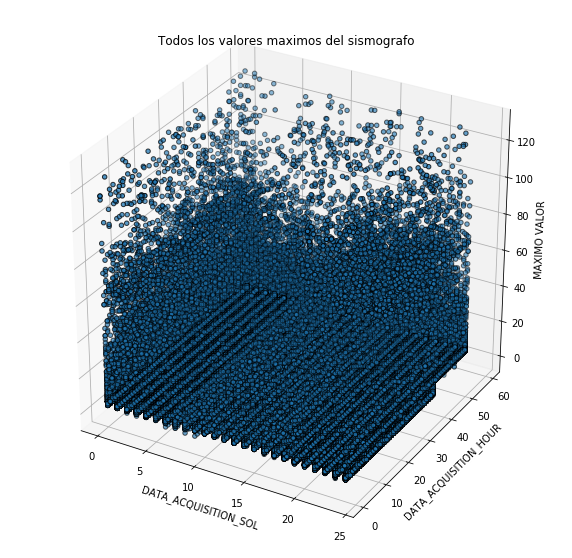

In [42]:
X = data_norm.values;

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

#y = np.choose(labels, [1, 2, 0]).astype(np.float)
ax.scatter(X[:,0],X[:,1],X[:,4], edgecolor='k')

#ax.scatter(X[:,0],X[:,1],X[:,2], edgecolor='y')
plt.title("Todos los valores maximos del sismografo")
ax.set_xlabel("DATA_ACQUISITION_SOL")
ax.set_ylabel("DATA_ACQUISITION_HOUR")
ax.set_zlabel('MAXIMO VALOR')


plt.show()

###### LAS LECTURAS CON UNA VELOCIDAD DEL VIENTO MENOR - IGUAL A  4 M / S

Text(0.5, 0, 'MAXIMO VALOR')

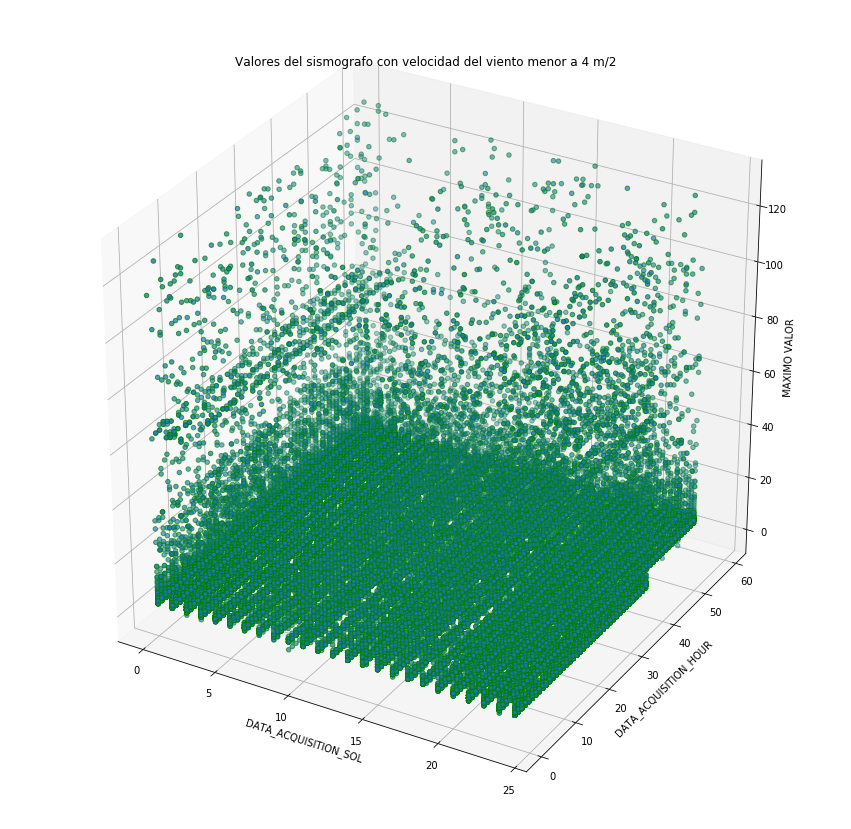

In [59]:
X_frame = data_norm[data_norm.WINDSPEED <= 4 ]
X = X_frame.values;

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

#y = np.choose(labels, [1, 2, 0]).astype(np.float)
ax.scatter(X[:,0],X[:,1],X[:,4], edgecolor='g')
   
    
#ax.scatter(X[:,0],X[:,1],X[:,2], edgecolor='y')
plt.title("Valores del sismografo con velocidad del viento menor a 4 m/2")
ax.set_xlabel("DATA_ACQUISITION_SOL")
ax.set_ylabel("DATA_ACQUISITION_HOUR")
ax.set_zlabel('MAXIMO VALOR')


#plt.show()

In [60]:
X.shape

(188824, 6)

# CLUSTERING CON DATOS CON MUY POCA INFLUENCIA DEL VIENTO

## Elección de datos

In [62]:
# Debido a que SEISMIC_TIME_SOLS declara el tiempo segun el dia, las horas y los segundos, usaremos unicamente este valor 
# como medidor de tiempo

In [91]:
# Vemos que elementos usar en funcion de la correlacion anterior

datos_pca = fd[['SEISMIC_TIME_SOLS','WINDSPEED','PRESSURE','WIND_DIRECTION','AIR_TEMPERATURE','MAXIMUM_X_AXIS']]
datos_pca = datos_pca[datos_pca.WINDSPEED <= 4 ]
datos_pca = datos_pca[~np.isnan(datos_pca).any(axis=1)]

# Estandarizamos los datos 

datos_std = StandardScaler().fit_transform(datos_pca)

# Volvemos a generar el DataFrame para mejor manejo

datos_pca_std = pd.DataFrame(datos_std, columns=datos_pca.columns)
datos_pca_std.describe()

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,SEISMIC_TIME_SOLS,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE,MAXIMUM_X_AXIS
count,1.888240e+05,1.888240e+05,1.888240e+05,1.888240e+05,1.888240e+05,1.888240e+05
mean,-1.425085e-13,6.307977e-15,2.287460e-13,5.265351e-16,4.541177e-15,-1.973096e-13
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.691701e+00,-2.200066e+00,-8.206834e+00,-1.375896e+00,-6.229314e+00,-6.190386e-01
25%,-7.159115e-01,-8.139223e-01,-1.116133e+00,-7.519074e-01,-7.037699e-01,-2.513958e-01
50%,1.998287e-02,-1.533381e-01,3.410141e-01,-3.440273e-01,-3.894358e-02,-2.513958e-01
75%,9.860469e-01,7.671481e-01,5.521947e-01,5.340344e-01,5.378263e-01,-1.594852e-01
max,1.381550e+00,2.131634e+00,2.353442e+00,2.128563e+00,2.558722e+00,1.105362e+01


Confirmamos que todas esas variables están de alguna forma correlacionadas

Ahora veremos que al estandarizar los valores, la matriz de correlación ha cambiado.

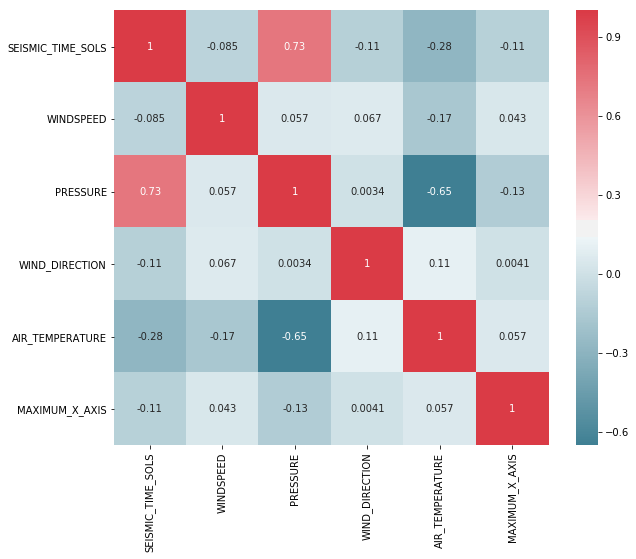

In [92]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = datos_pca_std.corr()
sns.heatmap(corr,square=True ,cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax , annot = True) 

Una vez tenemos ya los datos estandarizados, haremos uso de pca para reducir el número de variables.

Debido a que k-means solo puede representar valores en 2 y 3 dimensiones, tendremos que reducir de 6 componentes a 3.

## METODO PCA 

Aplicaremos el modelo para reducir las variables a tres comoponentes.
Una vez tenemos el modelo, aplicamos la transformación a nuestro dataset.


In [125]:
sklearn_pca = sklearnPCA(n_components=3)
datos_pca_3 = sklearn_pca.fit_transform(datos_pca_std)
datos_pca_3

array([[ 2.52276126, -0.08943823,  1.65867817],
       [ 2.50791187, -0.11652757,  1.60084569],
       [ 2.50617815, -0.11744228,  1.59969619],
       ...,
       [-0.67636489, -1.78016572,  0.1682911 ],
       [-0.66301904, -1.75258965,  0.22519548],
       [-0.66301904, -1.75258965,  0.22519548]])

## METODO K-MEANS

Lo primero será intuir cual es la k a la hora de tomar k grupos.
Para ello usaremos la gráfica de punto de codo:

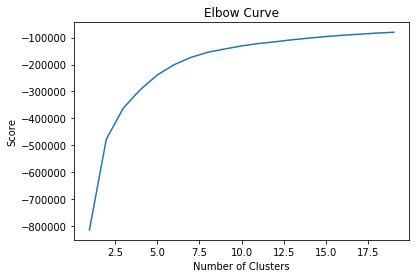

In [128]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(datos_pca_3).score(datos_pca_3) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Lo siguiente será ejecutar K-means y obtener los centroides y sus etiquetas:

In [130]:
kmeans = KMeans(n_clusters=5).fit(datos_pca_3)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.55397681 -0.28258372  0.41419702]
 [-0.94352577 -0.88934006  0.13752647]
 [-0.99798874  0.97955774 -0.36419581]
 [ 2.54869747  0.36223891 -1.35271687]
 [ 1.49218546  1.89426152  3.40212292]]


Lo mostramos todo:

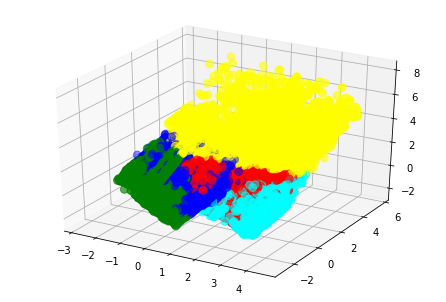

In [132]:
labels = kmeans.predict(datos_pca_3)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(datos_pca_3[:, 0], datos_pca_3[:, 1], datos_pca_3[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [133]:
copy =  pd.DataFrame()
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,44258
1,green,65833
2,blue,57038
3,cyan,16921
4,yellow,4774
